# **Final Project**, BAIT509 Winter 2023
**Business Applications of Machine Learning [100 Marks]**

**Deadline: Thursday, February 9th @ 11:59pm**

**Academic Integrity**

This is a group project. Do not share your code with other groups, or post any parts of your work online. You can only submit code that is produced by your group. If you use any online resource for developing parts of your code, you must explicitly acknowledge the source in a comment in your code. Students suspected of plagiarism on the project will be referred to the university for formal discipline according to the regulations.

**Please note that late submissions receive a mark of 0 as per course outline and RHL regulations.**

Please fill out the following:

**• Full Names of all Group members:**

Zhihao Hu

Junda Liu

Xinan Xu

**• Student Numbers of all Group member: **

76403963

88015821

98416811

**• Group number (from Canvas):**

Group 11

**Two submission files are required per group:**

For submitting this project, two files must be submitted on Canvas by the project deadline:

1) The complete Jupyter file (in .ipynb format) (that completely compiles on Google colab without any errors independent of the computer used.)

2) A self-contained and complete pdf printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

**Policy regarding the use of AI assistant tools**

If you use ChatGPT (or a similar tool) to get ideas and/or partial answers for this project or to generate any text, you must declare that you have used it, with a couple sentences describing the extent to which it was used, and you must save any generated text from this tool in case it is requested.

You will not be penalized for using such AI assistant tools, but the TA or the instructor may ask you to provide the generated text in order to help with grading decisions. In this case, your (or your group's) original contributions will be evaluated. Failure to fully declare the use of this tool will be considered "unauthorized" (See 3.b of the [Vancouver Academic Calendar](https://www.calendar.ubc.ca/vancouver/index.cfm?tree=3,54,111,1745))

## **Part 0: Loading the libraries and the data [0 Marks]**


In this project, we want to develop a statistical model for the mortality rate of lung cancer in the United States.

One of the parts overlooked in many machine learning projects is preprocessing. And a good way to learn it is by solving a lot of examples and test cases. A big part of this project is walking you through preprocessing, making informed decisions using your observations, and exploratory data analysis. Then we use supervised learning methods to construct models to predict the mortality rate of lung cancer using the features provided here.

In [18]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical learning
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score


## Loading data
Load the three csv files as pandas dataframes directly from their URLs.

In [19]:
fulldf = pd.read_csv('https://saref.github.io/teaching/BAIT509/mydata.csv').drop(columns='Unnamed: 0')
data_dict = pd.read_csv('https://saref.github.io/teaching/BAIT509/descriptions.csv')
populationdf = pd.read_csv('https://saref.github.io/teaching/BAIT509/populations.csv').drop(columns='Unnamed: 0')

Data set `mydata.csv` includes most of the data. Explanations on the meaning of each of the columns are included in `descriptions.csv`. Please take your time to understand the three dataframes before proceeding.

In [20]:
data_dict

Unnamed: 0              Feature  \
0            0                State   
1            1             AreaName   
2            2          All_Poverty   
3            3            M_Poverty   
4            4            F_Poverty   
5            5                 FIPS   
6            6           Med_Income   
7            7     Med_Income_White   
8            8     Med_Income_Black   
9            9    Med_Income_Nat_Am   
10          10     Med_Income_Asian   
11          11  Med_Income_Hispanic   
12          12               M_With   
13          13            M_Without   
14          14               F_With   
15          15            F_Without   
16          16             All_With   
17          17          All_Without   
18          18       Incidence_Rate   
19          19    Avg_Ann_Incidence   
20          20         Recent_Trend   
21          21       Mortality_Rate   
22          22       Avg_Ann_Deaths   

                                           Definition  \
0                                                 NaN   
1                                                 NaN   
2   Both male and female reported below poverty li...   
3                           Males below poverty (Raw)   
4                         Females below poverty (Raw)   
5                           State + County FIPS (Raw)   
6                   Med_Income all enthnicities (Raw)   
7                              Med_Income white (Raw)   
8                              Med_Income black (Raw)   
9                    Med_Income native American (Raw)   
10                             Med_Income Asian (Raw)   
11                          Med_Income Hispanic (Raw)   
12                  Males with health insurance (Raw)   
13               Males without health insurance (Raw)   
14                Females with health insurance (Raw)   
15             Females without health insurance (Raw)   
16            Males and Femaes with health ins. (Raw)   
17          Males an Females without health ins (Raw)   
18           Lung cancer incidence rate (per 100,000)   
19           Average lung cancer incidence rate (Raw)   
20                           Recent trend (incidence)   
21           Lung cancer mortality rate (per 100,000)   
22              Average lung cancer mortalities (Raw)   

                                 Notes  
0                                  NaN  
1                                  NaN  
2                                  NaN  
3                                  NaN  
4                                  NaN  
5                                  NaN  
6                                  NaN  
7                                  NaN  
8                                  NaN  
9                                  NaN  
10                                 NaN  
11                                 NaN  
12                                 NaN  
13                                 NaN  
14                                 NaN  
15                                 NaN  
16                                 NaN  
17                                 NaN  
18  '*' = fewer that 16 reported cases  
19                                 NaN  
20                                 NaN  
21  '*' = fewer that 16 reported cases  
22                                 NaN

In [21]:
fulldf.head()

State                            AreaName  All_Poverty  M_Poverty  \
0    AK      Aleutians East Borough, Alaska          553        334   
1    AK  Aleutians West Census Area, Alaska          499        273   
2    AK      Anchorage Municipality, Alaska        23914      10698   
3    AK          Bethel Census Area, Alaska         4364       2199   
4    AK         Bristol Bay Borough, Alaska           69         33   

   F_Poverty  FIPS  Med_Income  Med_Income_White  Med_Income_Black  \
0        219  2013     61518.0           72639.0           31250.0   
1        226  2016     84306.0           97321.0           93750.0   
2      13216  2020     78326.0           87235.0           50535.0   
3       2165  2050     51012.0           92647.0           73661.0   
4         36  2060     79750.0           88000.0               NaN   

   Med_Income_Nat_Am  ...  M_Without  F_With  F_Without  All_With  \
0            54750.0  ...       1317     566        540      1442   
1            48750.0  ...        769    1707        564      4177   
2            53935.0  ...      23245  122426      21393    243173   
3            41594.0  ...       2708    6627       1774     13023   
4            63333.0  ...        124     349         67       768   

   All_Without  Incidence_Rate  Avg_Ann_Incidence  Recent_Trend  \
0         1857               *         3 or fewer             *   
1         1333               *         3 or fewer             *   
2        44638            61.5                131        stable   
3         4482            62.7                  6        stable   
4          191               *         3 or fewer             *   

  Mortality_Rate Avg_Ann_Deaths  
0              *              *  
1              *              *  
2           47.3             96  
3           58.3              5  
4              *              *  

[5 rows x 23 columns]

In [22]:
fulldf.shape

(3134, 23)

## **Part 1: Getting started [40 Marks]**

## Data cleaning
In this project, we go through specific data cleaning steps. Please read through the instructions carefully.


### 1.1 Convert `FIPS` column to correct format [5 Marks]
Federal Information Processing Standard or [FIPS](https://en.wikipedia.org/wiki/FIPS_county_code) is a categorical variable. It is a code with five digits. The left two digits showing the state and the three right digits showing the county code. We recognize that desipite being a number, FIPS is actually a categorical variable.
First, check the format of the `FIPS` column and convert them to the five digit format with type `np.object_` as seen in the county level section, [here](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt#:~:text=county%2Dlevel%20%20%20%20%20%20place). 

*Hint*: You can use [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) to first convert the type and then use [`str.pad`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.pad.html) to format the values as five digit numbers.

In [23]:
def convert_to_str(value):
     return str(value)
fulldf['FIPS']=fulldf['FIPS'].apply(convert_to_str)
fulldf['FIPS']=fulldf['FIPS'].str.pad(width=5, side='left', fillchar='0')

In [24]:
#check the result
fulldf.head()

State                            AreaName  All_Poverty  M_Poverty  \
0    AK      Aleutians East Borough, Alaska          553        334   
1    AK  Aleutians West Census Area, Alaska          499        273   
2    AK      Anchorage Municipality, Alaska        23914      10698   
3    AK          Bethel Census Area, Alaska         4364       2199   
4    AK         Bristol Bay Borough, Alaska           69         33   

   F_Poverty   FIPS  Med_Income  Med_Income_White  Med_Income_Black  \
0        219  02013     61518.0           72639.0           31250.0   
1        226  02016     84306.0           97321.0           93750.0   
2      13216  02020     78326.0           87235.0           50535.0   
3       2165  02050     51012.0           92647.0           73661.0   
4         36  02060     79750.0           88000.0               NaN   

   Med_Income_Nat_Am  ...  M_Without  F_With  F_Without  All_With  \
0            54750.0  ...       1317     566        540      1442   
1            48750.0  ...        769    1707        564      4177   
2            53935.0  ...      23245  122426      21393    243173   
3            41594.0  ...       2708    6627       1774     13023   
4            63333.0  ...        124     349         67       768   

   All_Without  Incidence_Rate  Avg_Ann_Incidence  Recent_Trend  \
0         1857               *         3 or fewer             *   
1         1333               *         3 or fewer             *   
2        44638            61.5                131        stable   
3         4482            62.7                  6        stable   
4          191               *         3 or fewer             *   

  Mortality_Rate Avg_Ann_Deaths  
0              *              *  
1              *              *  
2           47.3             96  
3           58.3              5  
4              *              *  

[5 rows x 23 columns]

### 1.2 Check for null values [5 Marks]

Just check for null values and remove columns whenever the percentage of null values is greater than 20. Please briefly justify your choices w.r.t. the columns you have removed.

In [25]:
# get the number of null values per column
missing_values_count = fulldf.isnull().sum()
print(missing_values_count)

State                     0
AreaName                  0
All_Poverty               0
M_Poverty                 0
F_Poverty                 0
FIPS                      0
Med_Income                1
Med_Income_White          2
Med_Income_Black       1210
Med_Income_Nat_Am      1660
Med_Income_Asian       1757
Med_Income_Hispanic     681
M_With                    0
M_Without                 0
F_With                    0
F_Without                 0
All_With                  0
All_Without               0
Incidence_Rate            0
Avg_Ann_Incidence         0
Recent_Trend              0
Mortality_Rate            0
Avg_Ann_Deaths            0
dtype: int64


In [26]:
missing_values_count.index

Index(['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS',
       'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Med_Income_Hispanic',
       'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'Recent_Trend', 'Mortality_Rate',
       'Avg_Ann_Deaths'],
      dtype='object')

In [27]:
#remove columns whenever the percentage of null values is greater than 20
col_names=missing_values_count.index
count=0
for i in missing_values_count:
    if i/len(fulldf)>0.2:
        fulldf.drop(labels=col_names[count], axis=1, inplace=True)
        print("DROP: " + col_names[count]+ " "+ str(int(100*i/len(fulldf))) + "%")
    count+=1

DROP: Med_Income_Black 38%
DROP: Med_Income_Nat_Am 52%
DROP: Med_Income_Asian 56%
DROP: Med_Income_Hispanic 21%


From the result above, it is clear that columns 'Med_Income_Black',' Med_Income_Nat_Am','Med_Income_Asian',and 'Med_Income_Hispanic' should be removed. Their null value percentage are 38%, 52%, 56%, and 21% respectively.


In [28]:
# fulldf.head()

In [29]:
fulldf.shape

(3134, 19)

### 1.3 Check the format of columns [5 Marks]
Report the format of each column. List the columns that are in an unexpected format and state why you think that is the case.

*Hint*: You can do this by either inspecting the dataframe or by writing a code snippet that tells you what cells cannot be reformatted to the correct format. The Titatinc Jupyter file that we covered in class may also give you some useful ideas.

In [30]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   object 
 6   Med_Income         3133 non-null   float64
 7   Med_Income_White   3132 non-null   float64
 8   M_With             3134 non-null   int64  
 9   M_Without          3134 non-null   int64  
 10  F_With             3134 non-null   int64  
 11  F_Without          3134 non-null   int64  
 12  All_With           3134 non-null   int64  
 13  All_Without        3134 non-null   int64  
 14  Incidence_Rate     3134 non-null   object 
 15  Avg_Ann_Incidence  3134 non-null   object 
 16  Recent_Trend       3134 

#unexpected format：

The results above shows that there are four columns should be re-formated, which are 'Incidence_Rate','Avg_Ann_Incidence','Mortality_Rate',and 'Avg_Ann_Deaths'   

### 1.4 Merge the population data to the main dataframe [5 Marks]
You already know about FIPS. You can use the state and county columns in this dataset to construct a FIPS column in the population dataframe in the same format as the main dataframe. Then merge the population data to the main dataframe. It is up to you to decide the type of merge and whether it is done properly.

In [31]:
#check the data types of each columns
populationdf.dtypes

POPESTIMATE2015    int64
STATE              int64
COUNTY             int64
dtype: object

In [32]:
# Convert the 'STATE' and 'COUNTY' columns into string
populationdf['STATE']=populationdf['STATE'].apply(convert_to_str)
populationdf['COUNTY']=populationdf['COUNTY'].apply(convert_to_str)

#format the 'STATE' and 'COUNTY' columns
populationdf['STATE']=populationdf['STATE'].str.pad(width=2, side='left', fillchar='0')
populationdf['COUNTY']=populationdf['COUNTY'].str.pad(width=3, side='left', fillchar='0')

#Create the 'FIPS' column
populationdf['FIPS']=populationdf['STATE']+populationdf['COUNTY']

In [33]:
populationdf.head()

POPESTIMATE2015 STATE COUNTY   FIPS
0          4858979    01    000  01000
1            55347    01    001  01001
2           203709    01    003  01003
3            26489    01    005  01005
4            22583    01    007  01007

In [34]:
#Merge two data frames
fulldf = pd.merge(fulldf, populationdf[['POPESTIMATE2015', 'FIPS']], on='FIPS')

In [35]:
fulldf.head()

State                            AreaName  All_Poverty  M_Poverty  \
0    AK      Aleutians East Borough, Alaska          553        334   
1    AK  Aleutians West Census Area, Alaska          499        273   
2    AK      Anchorage Municipality, Alaska        23914      10698   
3    AK          Bethel Census Area, Alaska         4364       2199   
4    AK         Bristol Bay Borough, Alaska           69         33   

   F_Poverty   FIPS  Med_Income  Med_Income_White  M_With  M_Without  F_With  \
0        219  02013     61518.0           72639.0     876       1317     566   
1        226  02016     84306.0           97321.0    2470        769    1707   
2      13216  02020     78326.0           87235.0  120747      23245  122426   
3       2165  02050     51012.0           92647.0    6396       2708    6627   
4         36  02060     79750.0           88000.0     419        124     349   

   F_Without  All_With  All_Without Incidence_Rate Avg_Ann_Incidence  \
0        540      1442         1857              *        3 or fewer   
1        564      4177         1333              *        3 or fewer   
2      21393    243173        44638           61.5               131   
3       1774     13023         4482           62.7                 6   
4         67       768          191              *        3 or fewer   

  Recent_Trend Mortality_Rate Avg_Ann_Deaths  POPESTIMATE2015  
0            *              *              *             3341  
1            *              *              *             5702  
2       stable           47.3             96           298695  
3       stable           58.3              5            17946  
4            *              *              *              892

### 1.5 Cleaning the output (response) column `Mortality_Rate` [10 Marks]
Using the file `descriptions.csv`, explain what the non-numerical values of `Mortality_Rate` mean. 

Then, it is decision making time, we have to decide whether to remove the non-numerical values from `Mortality_Rate` or to assign a specific numerical value to them. This decision is based on you inferring if the non-numerical values were caused by error in data gathering or not. 

Note that if the observations are valid and are deleted, we are adding a bias to the model.

*Hint*: To get the full mark for this part, conduct multiple relevant exploratory data analyses. Then use them to support your decision on removing or modifying the non-numerical values. Your choice results in full mark if the supporting analysis and arguments are deemed adequate and convincing.

**Explanation for the non-numerical values of Mortality_Rate:**

there are fewer than 16 reported cases of mortality per 100,000 people for the lung cancer 

In [36]:
c=0
for i in fulldf['Mortality_Rate']:
    if i =='*':
        c+=1
print('Percentage of non-numerical values: '+str(round(c/len(fulldf)*100,2)) + '%')

Percentage of non-numerical values: 10.37%


In [37]:
# Remove the non-numerical values
fulldf = fulldf[fulldf['Mortality_Rate'] != '*']
fulldf.shape

(2809, 20)

**Reason to remove the non-numerical values:**

the variable Mortality_Rate becomes more normally-distributed after removing the non-numerical values as shown in the following histogram

(array([ 12., 122., 513., 881., 696., 279.,  85.,  18.,   8.,   4.]),
 array([  9.2 ,  20.84,  32.48,  44.12,  55.76,  67.4 ,  79.04,  90.68,
        102.32, 113.96, 125.6 ]),
 <BarContainer object of 10 artists>)

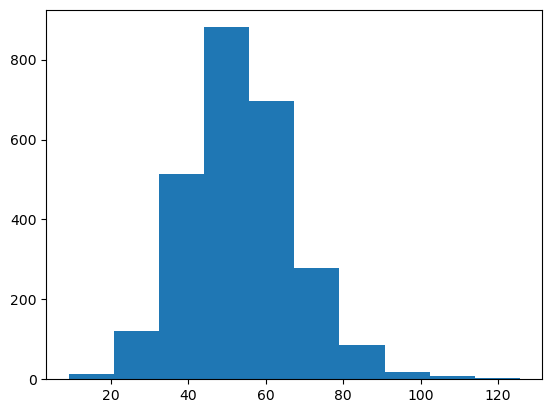

In [108]:
plt.hist(fulldf['Mortality_Rate'],bins=10)

In [38]:
#Reset the index
fulldf = fulldf.reset_index(drop=True)

### 1.6 Reformat the rest of the columns specified in 1.3 to numerical [5 Marks]
In each column reformat all the cells that you can. 

*Hint*: You can keep the cells that you cannot reformat until you decide if you want to use the specific column in the model. This is because you want to lose as least data as possible. So you can drop the associated rows if you want to use the column and keep them if the specific column is not used.

In [39]:
fulldf.dtypes

State                 object
AreaName              object
All_Poverty            int64
M_Poverty              int64
F_Poverty              int64
FIPS                  object
Med_Income           float64
Med_Income_White     float64
M_With                 int64
M_Without              int64
F_With                 int64
F_Without              int64
All_With               int64
All_Without            int64
Incidence_Rate        object
Avg_Ann_Incidence     object
Recent_Trend          object
Mortality_Rate        object
Avg_Ann_Deaths        object
POPESTIMATE2015        int64
dtype: object

In [40]:
#Convert the column 'Mortality_Rate' to float64
fulldf['Mortality_Rate'] = fulldf['Mortality_Rate'].astype('float64')

In [41]:
fulldf['FIPS'] = fulldf['FIPS'].astype('float64')

In [42]:
fulldf.dtypes

State                 object
AreaName              object
All_Poverty            int64
M_Poverty              int64
F_Poverty              int64
FIPS                 float64
Med_Income           float64
Med_Income_White     float64
M_With                 int64
M_Without              int64
F_With                 int64
F_Without              int64
All_With               int64
All_Without            int64
Incidence_Rate        object
Avg_Ann_Incidence     object
Recent_Trend          object
Mortality_Rate       float64
Avg_Ann_Deaths        object
POPESTIMATE2015        int64
dtype: object

In [43]:
fulldf= fulldf[fulldf['Incidence_Rate'] != '_']
fulldf= fulldf[fulldf['Incidence_Rate'] != '__']
fulldf= fulldf[fulldf['Avg_Ann_Incidence'] != '3 or fewer']

In [44]:
#reset the index
fulldf = fulldf.reset_index(drop=True)

In [45]:
fulldf.shape

(2641, 20)

In [46]:
#Convert the column 'Avg_Ann_Incidence' to int64
fulldf['Avg_Ann_Incidence'] = fulldf['Avg_Ann_Incidence'].astype('int64')

In [47]:
#Convert the column 'Incidence_Rate' to float64
for i in range(len(fulldf['Incidence_Rate'])):
    fulldf['Incidence_Rate'][i]=fulldf['Incidence_Rate'][i].replace("#", "")


C:\Users\pc\AppData\Local\Temp\ipykernel_31316\1043330064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulldf['Incidence_Rate'][i]=fulldf['Incidence_Rate'][i].replace("#", "")


In [48]:
fulldf['Incidence_Rate'] = fulldf['Incidence_Rate'].astype('float64')

In [49]:
#Convert the column 'Avg_Ann_Deaths' to int

for i in range(len(fulldf['Avg_Ann_Deaths'])):
    fulldf['Avg_Ann_Deaths'][i]=fulldf['Avg_Ann_Deaths'][i].replace(",", "")
fulldf['Avg_Ann_Deaths'] = fulldf['Avg_Ann_Deaths'].astype('int')

C:\Users\pc\AppData\Local\Temp\ipykernel_31316\1720694292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulldf['Avg_Ann_Deaths'][i]=fulldf['Avg_Ann_Deaths'][i].replace(",", "")


In [50]:
fulldf.head()

State                              AreaName  All_Poverty  M_Poverty  \
0    AK        Anchorage Municipality, Alaska        23914      10698   
1    AK            Bethel Census Area, Alaska         4364       2199   
2    AK  Fairbanks North Star Borough, Alaska         7752       3523   
3    AK       Juneau City and Borough, Alaska         2110       1145   
4    AK       Kenai Peninsula Borough, Alaska         5558       2596   

   F_Poverty    FIPS  Med_Income  Med_Income_White  M_With  M_Without  F_With  \
0      13216  2020.0     78326.0           87235.0  120747      23245  122426   
1       2165  2050.0     51012.0           92647.0    6396       2708    6627   
2       4229  2090.0     71068.0           74242.0   40605       6957   40210   
3        965  2110.0     85746.0           90553.0   13739       2433   13582   
4       2962  2122.0     63684.0           64663.0   22391       6435   21668   

   F_Without  All_With  All_Without  Incidence_Rate  Avg_Ann_Incidence  \
0      21393    243173        44638            61.5                131   
1       1774     13023         4482            62.7                  6   
2       5322     80815        12279            58.1                 36   
3       2213     27321         4646            35.1                  9   
4       5433     44059        11868            64.9                 39   

  Recent_Trend  Mortality_Rate  Avg_Ann_Deaths  POPESTIMATE2015  
0       stable            47.3              96           298695  
1       stable            58.3               5            17946  
2       stable            54.0              31            99631  
3       stable            34.4               8            32756  
4       stable            50.1              28            58059

In [51]:
# covert the 'Recent_Trend' column
fulldf['Recent_Trend'][fulldf['Recent_Trend'] == 'stable'] = 1
fulldf['Recent_Trend'][fulldf['Recent_Trend'] == 'rising'] = 2
fulldf['Recent_Trend'][fulldf['Recent_Trend'] == 'falling'] = 3
fulldf = fulldf[fulldf['Recent_Trend'] != '*']

C:\Users\pc\AppData\Local\Temp\ipykernel_31316\752116960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulldf['Recent_Trend'][fulldf['Recent_Trend'] == 'stable'] = 1
C:\Users\pc\AppData\Local\Temp\ipykernel_31316\752116960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulldf['Recent_Trend'][fulldf['Recent_Trend'] == 'rising'] = 2
C:\Users\pc\AppData\Local\Temp\ipykernel_31316\752116960.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [52]:
fulldf['Recent_Trend']=fulldf['Recent_Trend'].astype('int')

In [53]:
fulldf.dtypes

State                 object
AreaName              object
All_Poverty            int64
M_Poverty              int64
F_Poverty              int64
FIPS                 float64
Med_Income           float64
Med_Income_White     float64
M_With                 int64
M_Without              int64
F_With                 int64
F_Without              int64
All_With               int64
All_Without            int64
Incidence_Rate       float64
Avg_Ann_Incidence      int64
Recent_Trend           int32
Mortality_Rate       float64
Avg_Ann_Deaths         int32
POPESTIMATE2015        int64
dtype: object

In [54]:
fulldf.shape

(2618, 20)

### 1.7 Make the numerical data useful [5 Marks]
We know we have many columns of data, some of them are dependent on the populations. As a *Hint*, convert all the raw data to per 100,000 persons rates (divide by population and multiply by 100,000).

In [55]:
fulldf.head()

State                              AreaName  All_Poverty  M_Poverty  \
0    AK        Anchorage Municipality, Alaska        23914      10698   
1    AK            Bethel Census Area, Alaska         4364       2199   
2    AK  Fairbanks North Star Borough, Alaska         7752       3523   
3    AK       Juneau City and Borough, Alaska         2110       1145   
4    AK       Kenai Peninsula Borough, Alaska         5558       2596   

   F_Poverty    FIPS  Med_Income  Med_Income_White  M_With  M_Without  F_With  \
0      13216  2020.0     78326.0           87235.0  120747      23245  122426   
1       2165  2050.0     51012.0           92647.0    6396       2708    6627   
2       4229  2090.0     71068.0           74242.0   40605       6957   40210   
3        965  2110.0     85746.0           90553.0   13739       2433   13582   
4       2962  2122.0     63684.0           64663.0   22391       6435   21668   

   F_Without  All_With  All_Without  Incidence_Rate  Avg_Ann_Incidence  \
0      21393    243173        44638            61.5                131   
1       1774     13023         4482            62.7                  6   
2       5322     80815        12279            58.1                 36   
3       2213     27321         4646            35.1                  9   
4       5433     44059        11868            64.9                 39   

   Recent_Trend  Mortality_Rate  Avg_Ann_Deaths  POPESTIMATE2015  
0             1            47.3              96           298695  
1             1            58.3               5            17946  
2             1            54.0              31            99631  
3             1            34.4               8            32756  
4             1            50.1              28            58059

In [56]:
fulldf.dtypes

State                 object
AreaName              object
All_Poverty            int64
M_Poverty              int64
F_Poverty              int64
FIPS                 float64
Med_Income           float64
Med_Income_White     float64
M_With                 int64
M_Without              int64
F_With                 int64
F_Without              int64
All_With               int64
All_Without            int64
Incidence_Rate       float64
Avg_Ann_Incidence      int64
Recent_Trend           int32
Mortality_Rate       float64
Avg_Ann_Deaths         int32
POPESTIMATE2015        int64
dtype: object

In [57]:
fulldf['All_Poverty'] = (fulldf['All_Poverty']/fulldf['POPESTIMATE2015'])*100000
fulldf['M_Poverty'] = (fulldf['M_Poverty']/fulldf['POPESTIMATE2015'])*100000
fulldf['F_Poverty'] = (fulldf['F_Poverty']/fulldf['POPESTIMATE2015'])*100000

fulldf['M_With'] = (fulldf['M_With']/fulldf['POPESTIMATE2015'])*100000
fulldf['M_Without'] = (fulldf['M_Without']/fulldf['POPESTIMATE2015'])*100000


fulldf['F_With'] = (fulldf['F_With']/fulldf['POPESTIMATE2015'])*100000
fulldf['F_Without'] = (fulldf['F_Without']/fulldf['POPESTIMATE2015'])*100000


fulldf['All_With'] = (fulldf['All_With']/fulldf['POPESTIMATE2015'])*100000
fulldf['All_Without'] = (fulldf['All_Without']/fulldf['POPESTIMATE2015'])*100000

fulldf['Avg_Ann_Incidence'] = (fulldf['Avg_Ann_Incidence']/fulldf['POPESTIMATE2015'])*100000

fulldf['Avg_Ann_Deaths'] = (fulldf['Avg_Ann_Deaths']/fulldf['POPESTIMATE2015'])*100000

In [58]:
fulldf.head()

State                              AreaName   All_Poverty     M_Poverty  \
0    AK        Anchorage Municipality, Alaska   8006.160130   3581.579872   
1    AK            Bethel Census Area, Alaska  24317.396634  12253.426948   
2    AK  Fairbanks North Star Borough, Alaska   7780.710823   3536.048017   
3    AK       Juneau City and Borough, Alaska   6441.567957   3495.542801   
4    AK       Kenai Peninsula Borough, Alaska   9573.020548   4471.313664   

      F_Poverty    FIPS  Med_Income  Med_Income_White        M_With  \
0   4424.580257  2020.0     78326.0           87235.0  40424.848089   
1  12063.969687  2050.0     51012.0           92647.0  35640.254096   
2   4244.662806  2090.0     71068.0           74242.0  40755.387379   
3   2946.025156  2110.0     85746.0           90553.0  41943.460740   
4   5101.706884  2122.0     63684.0           64663.0  38565.941542   

      M_Without        F_With    F_Without      All_With   All_Without  \
0   7782.185842  40986.959942  7162.155376  81411.808032  14944.341218   
1  15089.713585  36927.449014  9885.211189  72567.703109  24974.924774   
2   6982.766408  40358.924431  5341.710913  81114.311811  12324.477321   
3   7427.646843  41464.159238  6756.014165  83407.619978  14183.661009   
4  11083.552938  37320.656573  9357.722317  75886.598116  20441.275254   

   Incidence_Rate  Avg_Ann_Incidence  Recent_Trend  Mortality_Rate  \
0            61.5          43.857447             1            47.3   
1            62.7          33.433634             1            58.3   
2            58.1          36.133332             1            54.0   
3            35.1          27.475882             1            34.4   
4            64.9          67.173048             1            50.1   

   Avg_Ann_Deaths  POPESTIMATE2015  
0       32.139808           298695  
1       27.861362            17946  
2       31.114814            99631  
3       24.423006            32756  
4       48.226804            58059

## **Part 2: Exploratory analysis [15 Marks]**

### 2.1 Visualizing different features [5 Marks]
Here, show different feature and how they change with respect to each other.
*Hint*: A good function to use here is `sns.pairplot`. Remember to have the plots labeled properly so that they are self explanatory.


In [59]:
fulldf= fulldf.iloc[:,2:]

In [60]:
fulldf=fulldf.drop('FIPS',axis=1)

In [61]:
fulldf.shape

(2618, 17)

In [62]:
fulldf.dtypes

All_Poverty          float64
M_Poverty            float64
F_Poverty            float64
Med_Income           float64
Med_Income_White     float64
M_With               float64
M_Without            float64
F_With               float64
F_Without            float64
All_With             float64
All_Without          float64
Incidence_Rate       float64
Avg_Ann_Incidence    float64
Recent_Trend           int32
Mortality_Rate       float64
Avg_Ann_Deaths       float64
POPESTIMATE2015        int64
dtype: object

In [63]:
fulldf.head()

All_Poverty     M_Poverty     F_Poverty  Med_Income  Med_Income_White  \
0   8006.160130   3581.579872   4424.580257     78326.0           87235.0   
1  24317.396634  12253.426948  12063.969687     51012.0           92647.0   
2   7780.710823   3536.048017   4244.662806     71068.0           74242.0   
3   6441.567957   3495.542801   2946.025156     85746.0           90553.0   
4   9573.020548   4471.313664   5101.706884     63684.0           64663.0   

         M_With     M_Without        F_With    F_Without      All_With  \
0  40424.848089   7782.185842  40986.959942  7162.155376  81411.808032   
1  35640.254096  15089.713585  36927.449014  9885.211189  72567.703109   
2  40755.387379   6982.766408  40358.924431  5341.710913  81114.311811   
3  41943.460740   7427.646843  41464.159238  6756.014165  83407.619978   
4  38565.941542  11083.552938  37320.656573  9357.722317  75886.598116   

    All_Without  Incidence_Rate  Avg_Ann_Incidence  Recent_Trend  \
0  14944.341218            61.5          43.857447             1   
1  24974.924774            62.7          33.433634             1   
2  12324.477321            58.1          36.133332             1   
3  14183.661009            35.1          27.475882             1   
4  20441.275254            64.9          67.173048             1   

   Mortality_Rate  Avg_Ann_Deaths  POPESTIMATE2015  
0            47.3       32.139808           298695  
1            58.3       27.861362            17946  
2            54.0       31.114814            99631  
3            34.4       24.423006            32756  
4            50.1       48.226804            58059

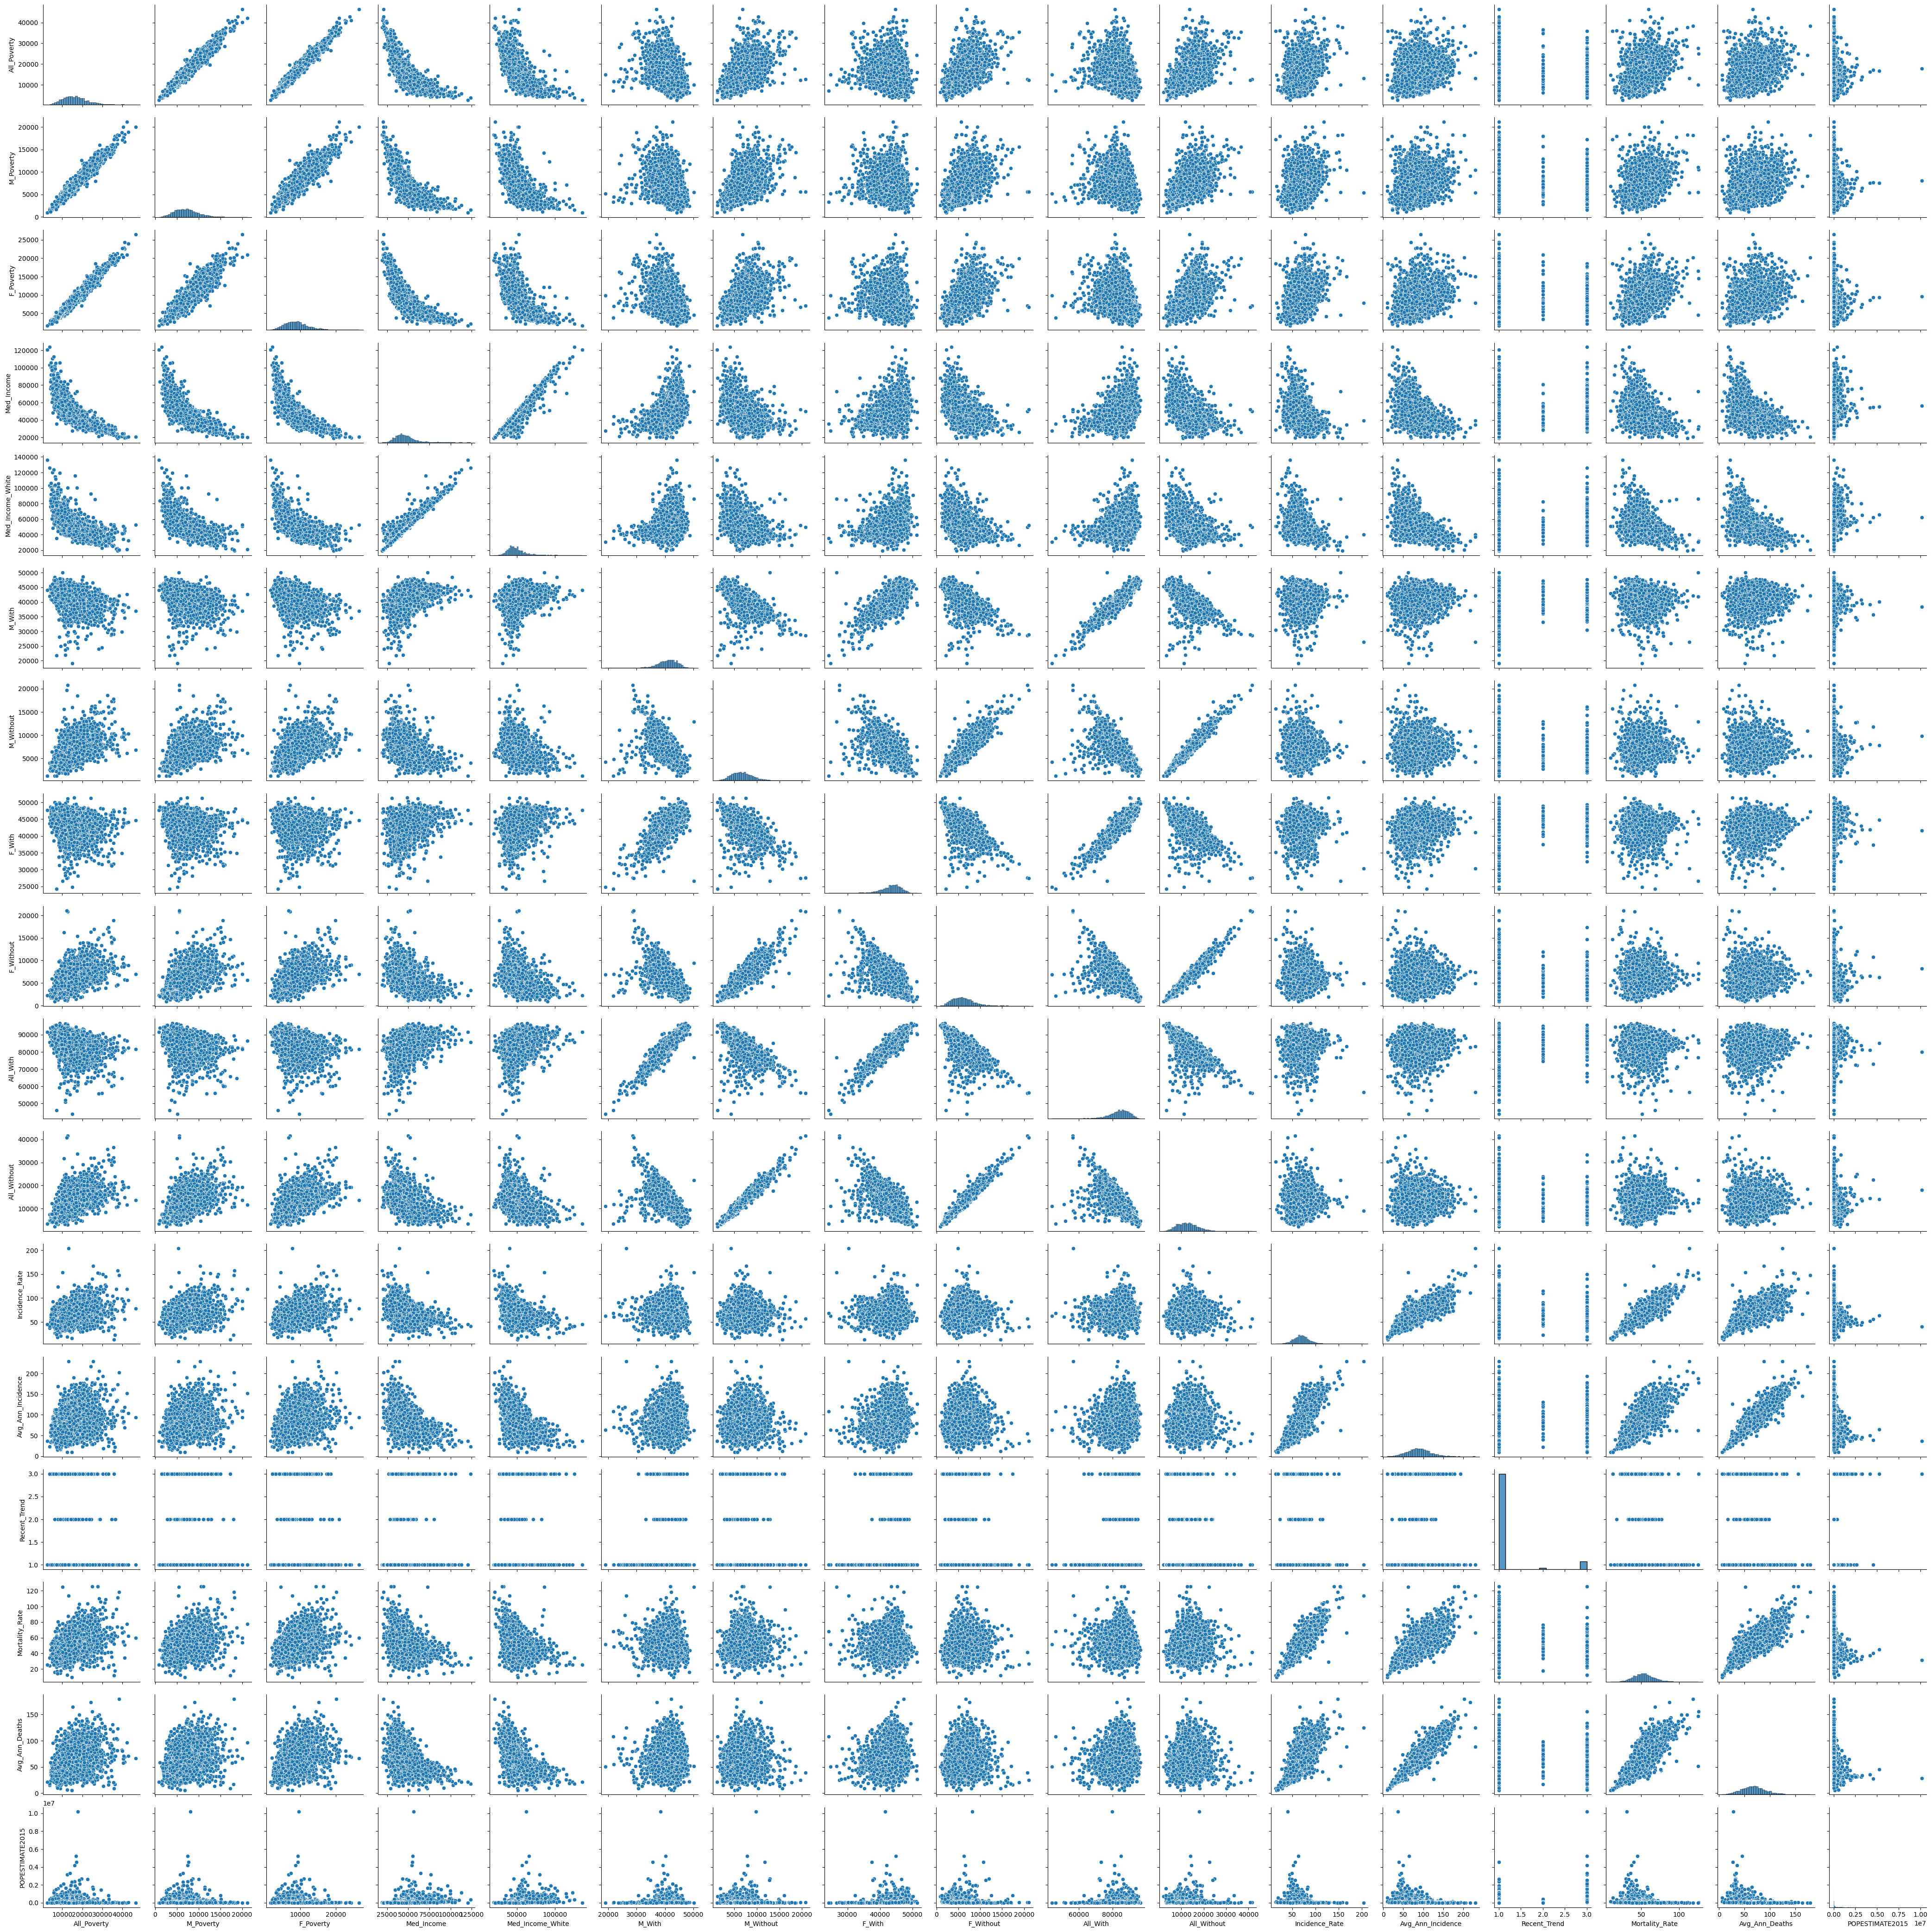

In [64]:
sns.pairplot(fulldf)

In [65]:
fulldf.corr()

All_Poverty  M_Poverty  F_Poverty  Med_Income  \
All_Poverty           1.000000   0.977545   0.984624   -0.785962   
M_Poverty             0.977545   1.000000   0.925703   -0.760946   
F_Poverty             0.984624   0.925703   1.000000   -0.779985   
Med_Income           -0.785962  -0.760946  -0.779985    1.000000   
Med_Income_White     -0.632386  -0.622021  -0.619483    0.938941   
M_With               -0.403726  -0.366120  -0.421178    0.346017   
M_Without             0.548692   0.549411   0.529445   -0.443056   
F_With               -0.206551  -0.219638  -0.188681    0.229982   
F_Without             0.536689   0.513020   0.538068   -0.441120   
All_With             -0.327770  -0.314151  -0.327918    0.308622   
All_Without           0.555527   0.543764   0.546396   -0.452550   
Incidence_Rate        0.331057   0.308426   0.338565   -0.383623   
Avg_Ann_Incidence     0.286495   0.268739   0.291476   -0.505620   
Recent_Trend         -0.065355  -0.060050  -0.067532    0.154382   
Mortality_Rate        0.388135   0.361757   0.396809   -0.446231   
Avg_Ann_Deaths        0.321742   0.300952   0.328040   -0.538672   
POPESTIMATE2015      -0.083319  -0.077604  -0.085225    0.258945   

                   Med_Income_White    M_With  M_Without    F_With  F_Without  \
All_Poverty               -0.632386 -0.403726   0.548692 -0.206551   0.536689   
M_Poverty                 -0.622021 -0.366120   0.549411 -0.219638   0.513020   
F_Poverty                 -0.619483 -0.421178   0.529445 -0.188681   0.538068   
Med_Income                 0.938941  0.346017  -0.443056  0.229982  -0.441120   
Med_Income_White           1.000000  0.218972  -0.355212  0.207827  -0.358619   
M_With                     0.218972  1.000000  -0.658666  0.755413  -0.662753   
M_Without                 -0.355212 -0.658666   1.000000 -0.636234   0.908584   
F_With                     0.207827  0.755413  -0.636234  1.000000  -0.686913   
F_Without                 -0.358619 -0.662753   0.908584 -0.686913   1.000000   
All_With                   0.227892  0.939408  -0.691303  0.934261  -0.720040   
All_Without               -0.365365 -0.676350   0.976818 -0.677266   0.976940   
Incidence_Rate            -0.379972 -0.067526   0.047643  0.030215   0.045596   
Avg_Ann_Incidence         -0.550891  0.069759   0.021338  0.130619   0.012230   
Recent_Trend               0.170481  0.025074  -0.033101  0.063131  -0.049652   
Mortality_Rate            -0.434299 -0.100928   0.128484 -0.024572   0.133488   
Avg_Ann_Deaths            -0.577255  0.048141   0.069731  0.101186   0.067650   
POPESTIMATE2015            0.300423 -0.035674  -0.009872  0.050403  -0.032082   

                   All_With  All_Without  Incidence_Rate  Avg_Ann_Incidence  \
All_Poverty       -0.327770     0.555527        0.331057           0.286495   
M_Poverty         -0.314151     0.543764        0.308426           0.268739   
F_Poverty         -0.327918     0.546396        0.338565           0.291476   
Med_Income         0.308622    -0.452550       -0.383623          -0.505620   
Med_Income_White   0.227892    -0.365365       -0.379972          -0.550891   
M_With             0.939408    -0.676350       -0.067526           0.069759   
M_Without         -0.691303     0.976818        0.047643           0.021338   
F_With             0.934261    -0.677266        0.030215           0.130619   
F_Without         -0.720040     0.976940        0.045596           0.012230   
All_With           1.000000    -0.722393       -0.020941           0.106298   
All_Without       -0.722393     1.000000        0.047722           0.017175   
Incidence_Rate    -0.020941     0.047722        1.000000           0.788868   
Avg_Ann_Incidence  0.106298     0.017175        0.788868           1.000000   
Recent_Trend       0.046673    -0.042367       -0.080266          -0.097837   
Mortality_Rate    -0.067780     0.134089        0.868957           0.719702   
Avg_Ann_Deaths     0.079135     0.070315        0.673093           0.91

<AxesSubplot: >

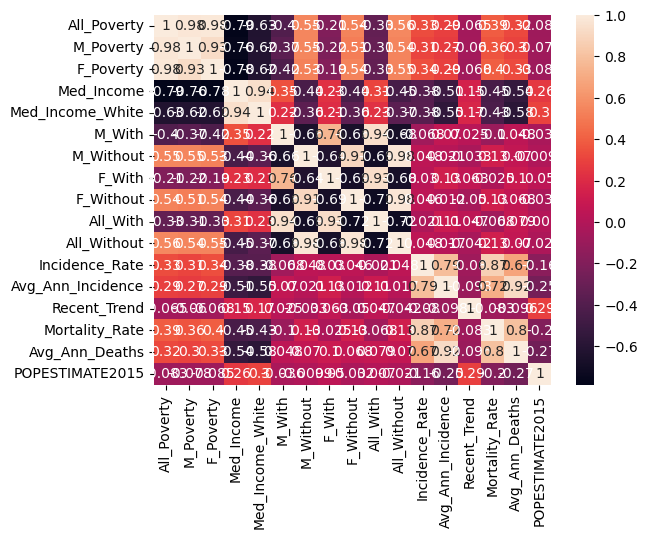

In [66]:
sns.heatmap(fulldf.corr(),annot=True)

In [67]:
fulldf.shape

(2618, 17)

### 2.2 Selecting the most important features [10 Marks]
In this step, we want to remove the redundant features. 

*Hint*: This can be done by analyzing the correlation between the features and removing the highly correlated features. Remember, throughout the project, write down specific reasons for any desicion you make.

In our analysis, the features: **M_Without,F_Without,All_Without,Avg_Ann_Incidence** are removed, the remaining features are kept.

**Reasons for removing the features:**

(1) For M_Without: there are strong correlations between M_Without and F_Without,All_Without, and we are interested in men with insurance has lower mortality rate, therefore we decided to remove M_Without and keep M_With

(2) For F_Without: there are strong correlations between F_Without and M_Without,All_Without, and we are interested in women with insurance has lower mortality rate, therefore we decided to remove W_Without and keep W_With

(3) For All_Without: there are strong correlations between ALL_Without and F_Without,M_Without, and we are interested in people with insurance has lower mortality rate, therefore we decided to remove ALL_Without and keep ALL_With

(4) For Avg_Ann_Incidence: there is strong correlation between Avg_Ann_Incidence and Incidence_Rate, both of the two features measure the rate of incidence but in different approaches, they duplicate with each other, so we should remove one of them. And considering the measure of the mortality rate is not in average unit, therefore we removed the Avg_Ann_Incidence.

The 3 models we came up are shown as follows:

model1: Mortality_Rate~All_Poverty+Med_Income+M_With+Incidence_Rate+Recent_Trend+POPESTIMATE2015+Avg_Ann_Deaths

model2: Mortality_Rate~M_Poverty+Med_Income_White+All_With+Incidence_Rate+Recent_Trend+POPESTIMATE2015+Avg_Ann_Deaths

model3:Mortality_Rate~F_Poverty+Med_Income+F_With+Incidence_Rate+Recent_Trend+POPESTIMATE2015+Avg_Ann_Deaths

## **Part 3: Regression Model Construction [30 Marks]**

### 3.1 Splitting the dataset [5 Marks] 

Split the dataset to three parts: train, validation, and test. You choose the ratios for the three datasets and provide a one-sentence rationale on why you went with such ratios.

*Hint*: You can use the validation set approach from ch5 lab (google colab).

In [69]:
fulldf1=fulldf

In [70]:
fulldf1.shape

(2618, 17)

In [71]:
fulldf1_hold_out=fulldf1[int(0.75*len(fulldf1)):len(fulldf1)]
fulldf1_hold_out

All_Poverty     M_Poverty     F_Poverty  Med_Income  Med_Income_White  \
1977  14940.352206   6646.468472   8293.883734     49531.0           50734.0   
1978  10522.221142   4998.541282   5523.679860     41920.0           43065.0   
1979  20995.417244   9836.939145  11158.478099     43109.0           50458.0   
1980  23309.939845  11887.711258  11422.228588     36608.0           38561.0   
1981  10043.308637   4645.835570   5397.473066     48912.0           49812.0   
...            ...           ...           ...         ...               ...   
2636  11334.199794   4878.322054   6455.877739     69022.0           69333.0   
2637   7083.243243   4436.756757   2646.486486     75325.0           77651.0   
2638  13663.432908   6978.196139   6685.236769     56569.0           56532.0   
2639  13652.737752   5871.757925   7780.979827     47652.0           48110.0   
2640  13243.019077   4893.558197   8349.460879     57738.0           57842.0   

            M_With     M_Without        F_With    F_Without      All_With  \
1977  42226.850975   6229.880704  44650.634350  5169.475478  86877.485325   
1978  39181.172809   9394.145677  42098.609355  8129.923174  81279.782165   
1979  38132.793350   9687.733134  38900.138548  9261.430246  77032.931898   
1980  43468.920080   6094.242337  44586.078488  4697.794328  88054.998568   
1981  45345.216364   4123.268549  44604.316547  4169.798490  89949.532911   
...            ...           ...           ...          ...           ...   
2636  44572.670640   7435.127504  41679.738269  6012.190203  86252.408910   
2637  38694.054054  11061.621622  41318.918919  5154.594595  80012.972973   
2638  43857.458457   6786.091634  41835.558544  7218.326770  85693.017001   
2639  40213.736792   8297.310279  41906.820365  8441.402498  82120.557157   
2640  40461.708598   6275.919270  42673.486315  4340.613768  83135.194913   

       All_Without  Incidence_Rate  Avg_Ann_Incidence  Recent_Trend  \
1977  11399.356183            83.0         113.614846             1   
1978  17524.068852            60.8          87.523096             1   
1979  18949.163381            48.9          63.945433             1   
1980  10792.036666            61.4          50.128903             1   
1981   8293.067039            49.4          57.267619             1   
...            ...             ...                ...           ...   
2636  13447.317707            39.9          31.371846             1   
2637  16216.216216            23.7          21.621622             1   
2638  14004.418404            31.7          28.815676             1   
2639  16738.712776            50.0          72.046110             1   
2640  10616.533038            44.9          55.294443             1   

      Mortality_Rate  Avg_Ann_Deaths  POPESTIMATE2015  
1977            53.7       75.743230             5281  
1978            59.5       77.798308            10283  
1979            34.5       42.630289             9383  
1980            51.0       42.967631            13964  
1981            45.2       53.688393            27939  
...              ...             ...              ...  
2636            28.4       20.167615            44626  
2637            29.1       21.621622            23125  
2638            22.1       19.210450            20822  
2639            38.2       60.038425             8328  
2640            43.5       55.294443             7234  

[655 rows x 17 columns]

In [72]:
fulldf1=fulldf1[0:int(0.75*len(fulldf1))]

In [73]:
fulldf1.train=fulldf1[0:int(2*len(fulldf1)/3)]
len(fulldf1.train)

C:\Users\pc\AppData\Local\Temp\ipykernel_31316\3792877590.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  fulldf1.train=fulldf1[0:int(2*len(fulldf1)/3)]


1308

In [74]:
fulldf1.val=fulldf1[int(2*len(fulldf1)/3):]
len(fulldf1.val)

C:\Users\pc\AppData\Local\Temp\ipykernel_31316\851990101.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  fulldf1.val=fulldf1[int(2*len(fulldf1)/3):]


655

**Rationale for the split**:
This is a common method of spliting dataset for Machine Learning projects, as the dataset is large, 50% for training is sufficient and we will have more data for testing and validation.

### 3.2 Model training [15 Marks]
Create three different models, using different features (and optionally nonlinear transformations). The purpose of these models is to predict mortality rate of lung cancer with reasonably high R2 (at least exceeding 70%) using a carefully chosen and justified set of features. Use the visualizations from section 2.1 to inform the feature selection for each model.

In [75]:
lm1 = smf.ols('Mortality_Rate~All_Poverty+Med_Income+M_With+Incidence_Rate+Avg_Ann_Deaths',data=fulldf1.train).fit()

In [76]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1551.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:17:10   Log-Likelihood:                -4127.6
No. Observations:                1308   AIC:                             8267.
Df Residuals:                    1302   BIC:                             8298.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3876      2.710      1.

In [77]:
lm2 = smf.ols('Mortality_Rate~M_Poverty+Med_Income_White+All_With+Incidence_Rate+Recent_Trend+POPESTIMATE2015+Avg_Ann_Deaths',data=fulldf1.train).fit()

In [78]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1154.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:17:11   Log-Likelihood:                -4103.8
No. Observations:                1308   AIC:                             8224.
Df Residuals:                    1300   BIC:                             8265.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.1926      2.653  

In [79]:
lm3 = smf.ols('Mortality_Rate~F_Poverty+Med_Income+F_With+Incidence_Rate+Avg_Ann_Deaths',data=fulldf1.train).fit()

In [80]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1614.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:17:12   Log-Likelihood:                -4105.2
No. Observations:                1308   AIC:                             8222.
Df Residuals:                    1302   BIC:                             8253.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.6053      2.589      2.

### 3.3 Model selection [10 Marks]
Using different model selection criteria and validation dataset, choose the single best perfoming model among the three models.

In [81]:
from sklearn import metrics
y1=lm1.predict(fulldf1.val)
MSE1 = metrics.mean_squared_error(fulldf1.val['Mortality_Rate'],y1)
RMSE1 = metrics.mean_squared_error(fulldf1.val['Mortality_Rate'],y1)**0.5
MAE1 = metrics.mean_absolute_error(fulldf1.val['Mortality_Rate'],y1)
MAPE1 = metrics.mean_absolute_percentage_error(fulldf1.val['Mortality_Rate'],y1)
print(MSE1,RMSE1,MAE1,MAPE1)

22.167050824600953 4.708189760895471 3.6327529852672384 0.0775131321894302


In [82]:
y2=lm2.predict(fulldf1.val)
MSE2 = metrics.mean_squared_error(fulldf1.val['Mortality_Rate'],y2)
RMSE2 = metrics.mean_squared_error(fulldf1.val['Mortality_Rate'],y2)**0.5
MAE2 = metrics.mean_absolute_error(fulldf1.val['Mortality_Rate'],y2)
MAPE2 = metrics.mean_absolute_percentage_error(fulldf1.val['Mortality_Rate'],y2)
print(MSE2,RMSE2,MAE2,MAPE2)

22.715175144913715 4.766043972196828 3.635212937864251 0.07760744053976765


In [83]:
y3=lm3.predict(fulldf1.val)
MSE3 = metrics.mean_squared_error(fulldf1.val['Mortality_Rate'],y3)
RMSE3 = metrics.mean_squared_error(fulldf1.val['Mortality_Rate'],y3)**0.5
MAE3 = metrics.mean_absolute_error(fulldf1.val['Mortality_Rate'],y3)
MAPE3 = metrics.mean_absolute_percentage_error(fulldf1.val['Mortality_Rate'],y3)
print(MSE3,RMSE3,MAE3,MAPE3)

22.014786358055336 4.691991726128184 3.578479760108238 0.07682221446492762


Based on the results of MSE,RMSE,MAE,MAPE, we selected model3 as our final model because it produces the least prediction errors among the 3 models, our final model is:

Mortality_Rate~F_Poverty+Med_Income+F_With+Incidence_Rate+Avg_Ann_Deaths

## **Part 4: Model diagnostics [10 marks]**
Explore model collinearity with `variance_inflation_factor`. Larger values of VIF indicate multicollinearity. Remove the problematic features and refit the model. Report how model R-squared is affected.

*Hint:* Consider VIF > 10 as an indicator of multicollinearity. If the VIF for all your features is below 10, it is a positive indication that the level of collinearity is acceptably low without any changes to the model needed in this step.

In [84]:
fulldf3=fulldf1.train[['F_Poverty','Med_Income','F_With','Incidence_Rate','Avg_Ann_Deaths']]
fulldf3['c']= 1 

C:\Users\pc\AppData\Local\Temp\ipykernel_31316\298371645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulldf3['c']= 1


In [85]:
#define a function to calculate the vif
def calculate_vif(df):
    vif = pd.DataFrame()
    x = np.matrix(df)
    x = sm.add_constant(x) # add the constant
    vif['feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
    return vif

In [86]:
calculate_vif(fulldf3)

feature         VIF
0       F_Poverty    2.955225
1      Med_Income    4.044455
2          F_With    1.190475
3  Incidence_Rate    2.056283
4  Avg_Ann_Deaths    2.772715
5               c  280.158329

From the VIF result above, all the features have a vif less than 10, which means the level of collinearity is acceptably low without any changes to the model needed in this step. The model remains the same:

In [87]:
lm3 = smf.ols('Mortality_Rate~F_Poverty+Med_Income+F_With+Incidence_Rate+Avg_Ann_Deaths',data=fulldf1.train).fit()

In [88]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1614.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:17:22   Log-Likelihood:                -4105.2
No. Observations:                1308   AIC:                             8222.
Df Residuals:                    1302   BIC:                             8253.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.6053      2.589      2.

## **Part 5: Reporting test performance [5 marks]**
Report the MSE of the final regression model using the test set.

In [89]:
y4=lm3.predict(fulldf1_hold_out)
MSE4 = metrics.mean_squared_error(fulldf1_hold_out['Mortality_Rate'],y4)
print(MSE4)

32.09322409817395


## **Part 6: Alternative predictive model (optional): [20 bonus points up to the maximum mark]**

Use one other supervised learning model to outperform the regression model from part 5 (in terms of MSE) on the same hold-out test set. Document, justify, and explain all your decision w.r.t. the implementation of this alternative predictive model.

This part is deliberately designed without clear instructions as bonus points for efforts of groups in completing a very common ML task without a walkthrough or instrcutions.

**Alternative prediction model:** Boosted Decision Tree Regression

**Reasons for implementing the model:**

(1) The model improves the prediction accuracy by reducing MSE from 32.09 to 9.30

(2) The model produces less errors for the testing dataset compared with the random forest and bagging method

(3) The model represents the effect of each predictor after accounting for the effects of other predictors

Fit the boosting model

In [90]:
fulldf.shape

(2618, 17)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import tree

In [92]:
X = fulldf.drop('Mortality_Rate', axis=1)
y = fulldf['Mortality_Rate']
train_size = 2000
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, 
                                    test_size=X.shape[0]-train_size, random_state=0)

In [93]:
regr_boost = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.03, max_depth=2, random_state=1)
regr_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=2, n_estimators=2000,
                          random_state=1)

In [94]:
y_pred = regr_boost.predict(X_val)
print(mean_squared_error(y_val,y_pred))

9.302090668513978


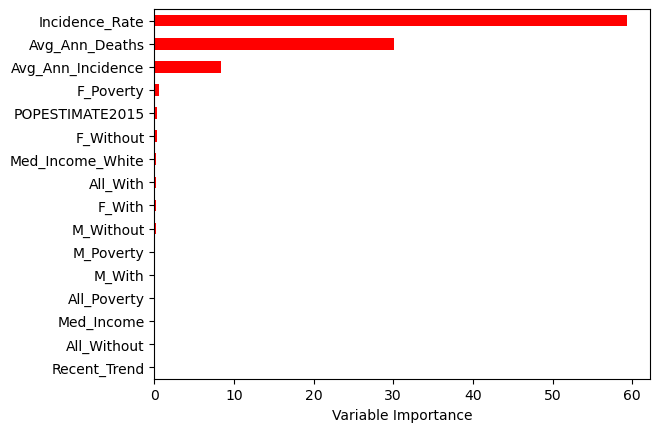

In [95]:
#check the feature importance
rel_imp = pd.Series(regr_boost.feature_importances_*100, index=X_train.columns).sort_values()
rel_imp.plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Fit the random forest model

In [96]:
# here we'll use max_features = 4 (close to square root of all features as a rule of thumb)
regr_rf = RandomForestRegressor(max_features=4, random_state=1)
regr_rf.fit(X_train, y_train)

#check the MSE
y_pred = regr_rf.predict(X_val)
print(mean_squared_error(y_val, y_pred))

30.409493653721682


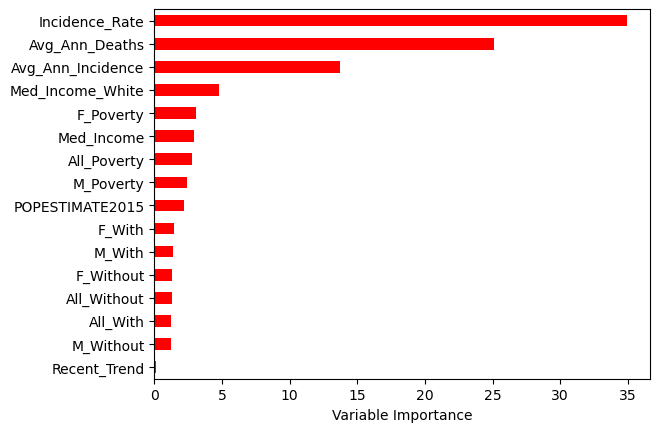

In [97]:
#check the feature importance
Importance = pd.DataFrame({'Importance':regr_rf.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Fit the bagging model

In [98]:
all_features = X_train.shape[1]
regr_bagging = RandomForestRegressor(max_features=all_features, random_state=1)
regr_bagging.fit(X_train, y_train)

RandomForestRegressor(max_features=16, random_state=1)

In [99]:
#check the MSE
y_pred = regr_bagging.predict(X_val)
print(mean_squared_error(y_val, y_pred))

18.216257233009685


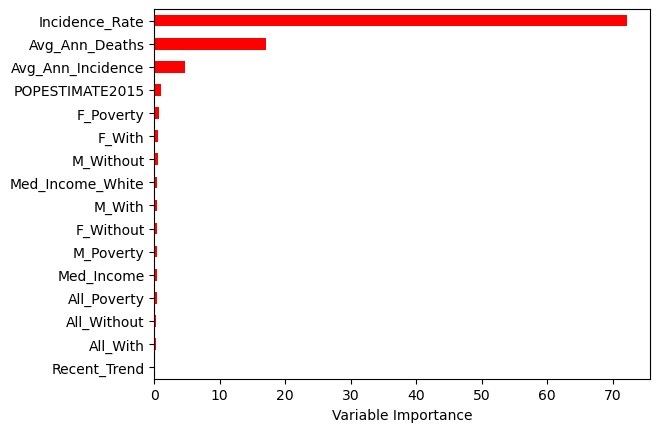

In [100]:
#check the feature importance
Importance = pd.DataFrame({'Importance':regr_bagging.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None